# Laboratorio de regresión - 3

## Significancia de factores

|                |   |
:----------------|---|
| **Nombre**     | Ana Sofía Hinojosa Bale  |
| **Fecha**      | 24 de agosto 2025        |
| **Expediente** | 742594                   |

Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [106]:
%pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
import statsmodels.api as sm
from IPython.display import display, Markdown

In [108]:
data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


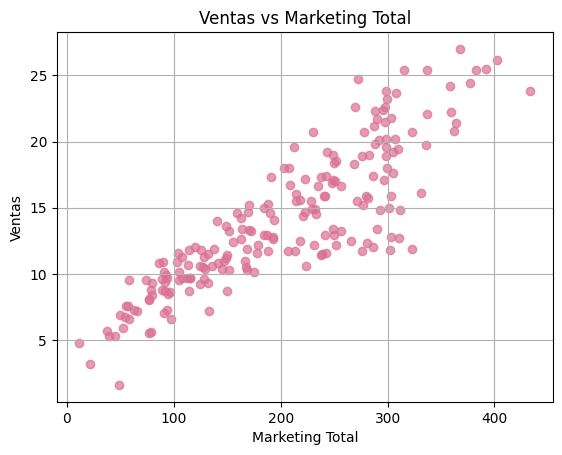

In [109]:
plt.scatter(data['TV']+ data['radio'] + data['newspaper'], data['sales'], color = "palevioletred", alpha = 0.7)
plt.title("Ventas vs Marketing Total")
plt.xlabel("Marketing Total"); plt.ylabel("Ventas")
plt.grid()

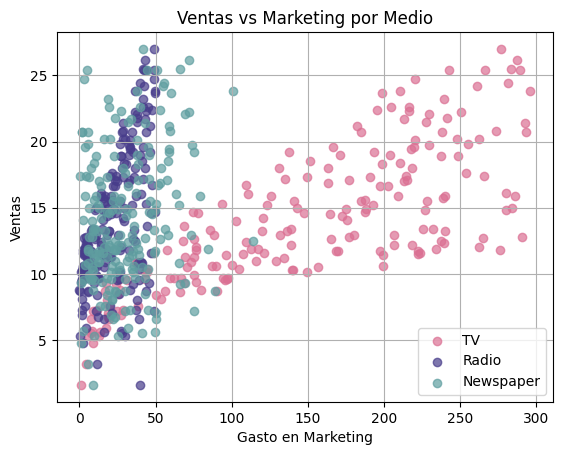

In [110]:
plt.scatter(data['TV'], data['sales'], color = "palevioletred", alpha = 0.7, label = "TV")
plt.scatter(data['radio'], data['sales'], color = "darkslateblue", alpha = 0.7, label = "Radio")
plt.scatter(data['newspaper'], data['sales'], color = "cadetblue", alpha = 0.7, label = "Newspaper")
plt.title("Ventas vs Marketing por Medio")
plt.xlabel("Gasto en Marketing"); plt.ylabel("Ventas")
plt.legend()
plt.grid()

**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

Sí hay relación entre el presupuesto para publicidad en las ventas, más que nada en el caso de TV, como se puede observar en la gráfica presentada previamente. Se puede notar como a medida que aumento en presupuesto en marketing en el eje $x$ aumenta también las ventas en el eje $y$.

Si no hubiera relación entre el presupuesto de publicidad y las ventas, entonces invertir más dinero en publicidad no ayudaría a aumentar las ventas. Esto significaría que la empresa estaría gastando en publicidad sin obtener beneficios reales, y sería mejor buscar otras estrategias para mejorar las ventas.
Por eso es importante analizar los datos y comprobar si realmente existe una asociación antes de tomar decisiones de inversión.

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

Sí, ya que conocer qué tan fuerte es la relación entre la publicidad y las ventas nos dice qué tanto vale la pena invertir más en la publicidad, ya que si fuera el caso de que la relación entre las variables no es fuerte, no tendría caso que se seguiera inviertiendo tanto en la publicidad y sería mejor enfocarse en algún otro aspecto.

La relación a simple vista parece fuerte, pero es con los coeficientes de la regresión y el valor del $R^2$ que verdaderamente se notará que tan fuerte es la relación.

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Realiza una regresión lineal:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

In [111]:
lr = LinearRegression()
x = data['TV']
y= data['sales']

In [112]:
lr.fit(x.values.reshape(-1,1), y)
lr.intercept_, lr.coef_

(np.float64(7.0325935491276885), array([0.04753664]))

In [113]:
b0 = lr.intercept_
b1 = lr.coef_

$$\hat\beta_0 \approx 7$$
$$\hat\beta_1 \approx 0.0475$$

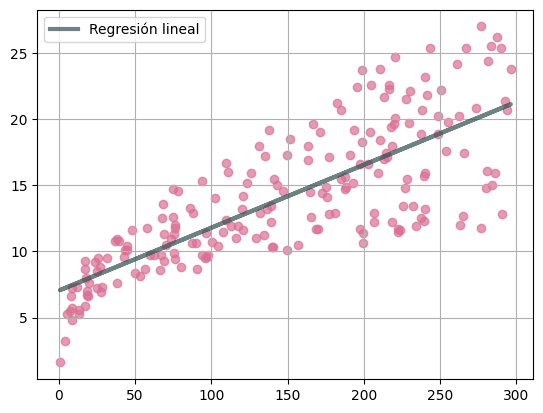

In [114]:
plt.scatter(data['TV'], data['sales'], color = "palevioletred", alpha = 0.7)
plt.plot(x, lr.predict(x.values.reshape(-1,1)), color = "darkslategrey", label = "Regresión lineal", linewidth = 3, alpha = 0.7)
plt.grid()
plt.legend()

---

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

**¿Cuál es la diferencia entre población y muestra?**

Una población es el total de los datos existentes, el conjunto total de elementos que se quieren estudiar, mientras que la muestra es una parte de dicha población, un subconjunto de esta, que se puede utilizar para analizar e inferir conclusiones de la población completa.

En el caso de estudiar el efecto de la publicidad en las ventas, la población serían todas las ventas posibles bajo diferentes presupuestos de publicidad. La muestra sería el conjunto de ventas que realmente se observan y registran en el estudio, es decir, los datos que se tienen disponibles y que se usan para hacer el análisis estadístico. Esta muestra debe ser representativa de la población para que las conclusiones sean válidas.

**¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?**

Si se hace una regresión con todos los datos de una población, los resultados que se obtengan serán la relación real que se tiene entre las variables que se estén usando, mientras que si se hace la regresión en una muestra de la población, aunque sea una muy buena regresión, siempre queda un factor de incertidumbre, las estimaciones pueden variar dependiendo de los datos que se seleccionaron para la muestra, y se tendrá un margen de error.

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-p}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [115]:
y_pred = lr.predict(x.values.reshape(-1,1))
n = len(x)
x_mean = np.mean(x)
rss = np.sum((y_pred - y)**2)
var = rss/(n - 2)
se_b0 = np.sqrt(var * (1/n + (x_mean**2)/np.sum((x - x_mean)**2)))
se_b0


np.float64(0.4578429402734785)

In [116]:
se_b1 = np.sqrt(var / (np.sum((x - x_mean)**2)))
se_b1

np.float64(0.0026906071877968707)

In [117]:
X = np.column_stack((np.ones(len(x)), x)) 
var_beta = np.linalg.inv(X.T @ X) * var
std_beta = np.sqrt(np.diag(var_beta))
std_beta

array([0.45784294, 0.00269061])

Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm 2\text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [118]:
mas_b0 = b0 + 2*se_b0
menos_b0 = b0 - 2*se_b0
mas_b1 = b1 + 2*se_b1
menos_b1 = b1 - 2*se_b1

In [119]:
menos_b0, mas_b0

(np.float64(6.1169076685807315), np.float64(7.9482794296746455))

In [120]:
menos_b1, mas_b1

(array([0.04215543]), array([0.05291785]))

Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

**Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.**

La hipótesis nula $H_0$ es la afirmación que se está asumiendo como cierta desde un inicio. En este caso, esta afirmación es que no hay relación entre $X$ y $Y$, es decir, que los resultados (las ventas), no dependan de la variable de marketing que se esté utilizando, y que el hecho de incrementar dicha variable no incrementaría las ventas. La hipótesis alternativa $H_1$ contradice a la $H_0$, por lo que afirma que sí existe relación entre $X$ y $Y$. 

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [121]:
t_b0 = b0 / se_b0
t_b1 = b1 / se_b1
t_b0, t_b1

(np.float64(15.360275174117534), array([17.6676256]))

La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-p))`

In [122]:
p_b0 = 2*(1 - stats.t.cdf(np.abs(t_b0), n - 2))

In [123]:
p_b1 = 2*(1 - stats.t.cdf(np.abs(t_b1), n - 2))

In [124]:
p_b0, p_b1

(np.float64(0.0), array([0.]))

**¿Se rechaza la hipótesis nula? ¿Qué significa?**


El p-value es un número que dice qué probabilidad hay de ver los datos en el caso de que $H_0$ fuera cierta, si los resultados que se ven son por casualidad o por alguna relación entre las variables. Si este p-value es menor a $0.05$, se puede decir que la $H_0$ se rechaza, por lo que sí hay relación entre las variables.

En este caso, el p-value sí es menor a 0.05, por lo que se rechaza la hipótesis nula. Esto significa que sí hay relación entre la variable del marketing en TV y las ventas.

---

## Funciones

In [137]:
def todo(x, y):
    nombre = x.name
    x = x.values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(x, y)
    b0 = lr.intercept_
    b1 = lr.coef_[0]
    y_pred = lr.predict(x.reshape(-1,1))
    n = len(x)
    x_mean = np.mean(x)
    rss = np.sum((y_pred - y)**2)
    var = rss/(n - 2)
    se_b0 = np.sqrt(var * (1/n + (x_mean**2)/np.sum((x - x_mean)**2)))
    se_b1 = np.sqrt(var / (np.sum((x - x_mean)**2)))
    mas_b0 = b0 + 2*se_b0
    menos_b0 = b0 - 2*se_b0
    mas_b1 = b1 + 2*se_b1
    menos_b1 = b1 - 2*se_b1
    t_b0 = b0 / se_b0
    t_b1 = b1 / se_b1
    p_b0 = 2*(1 - stats.t.cdf(np.abs(t_b0), n - 2))
    p_b1 = 2*(1 - stats.t.cdf(np.abs(t_b1), n - 2))

    resultados = pd.DataFrame({
    "Parámetro": [r"$\hat\beta_0$", r"$\hat\beta_1$"],
    "Estimación": [float(b0), float(b1)],
    "Error estándar": [float(se_b0), float(se_b1)],
    "Intervalo de confianza": [f"[{menos_b0:.3f}, {mas_b0:.3f}]", f"[{menos_b1:.3f}, {mas_b1:.3f}]"],
    "Estadístico t": [float(t_b0), float(t_b1)],
    "p-value": [float(p_b0), float(p_b1)]
})
    display(Markdown(f"### Resultados de la regresión de ventas dado el gasto en publicidad en **{nombre}**"))
    display(Markdown(resultados.to_markdown()))

def grafica(x, y):
    lr = LinearRegression()
    lr.fit(x.values.reshape(-1, 1), y)
    plt.scatter(x, y, color="palevioletred", label="Datos", alpha = 0.7)
    plt.plot(x, lr.predict(x.values.reshape(-1, 1)), color="darkslategrey", label="Regresión")
    plt.grid()
    plt.legend()

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

In [138]:
todo(data['TV'], data['sales'])

### Resultados de la regresión de ventas dado el gasto en publicidad en **TV**

|    | Parámetro     |   Estimación |   Error estándar | Intervalo de confianza   |   Estadístico t |   p-value |
|---:|:--------------|-------------:|-----------------:|:-------------------------|----------------:|----------:|
|  0 | $\hat\beta_0$ |    7.03259   |       0.457843   | [6.117, 7.948]           |         15.3603 |         0 |
|  1 | $\hat\beta_1$ |    0.0475366 |       0.00269061 | [0.042, 0.053]           |         17.6676 |         0 |

El análisis arrojó un p-value de 0 para ambos parámetros, lo que indica que existe evidencia estadísticamente significativa para rechazar la hipótesis nula de que no hay relación entre las variables. Por lo tanto, se concluye que el gasto en publicidad en televisión sí está relacionado con la cantidad de ventas.

Por cada unidad extra invertida en la publicidad en televisión, las ventas aumentan 0.0475, como se puede observar en la siguiente ecuación: 

$$ \hat y = 7.03259 + 0.0475366x_{tv}$$

In [139]:
todo(data['radio'], data['sales'])

### Resultados de la regresión de ventas dado el gasto en publicidad en **radio**

|    | Parámetro     |   Estimación |   Error estándar | Intervalo de confianza   |   Estadístico t |   p-value |
|---:|:--------------|-------------:|-----------------:|:-------------------------|----------------:|----------:|
|  0 | $\hat\beta_0$ |     9.31164  |        0.5629    | [8.186, 10.437]          |        16.5422  |         0 |
|  1 | $\hat\beta_1$ |     0.202496 |        0.0204113 | [0.162, 0.243]           |         9.92077 |         0 |

El análisis arrojó un p-value de 0 para ambos parámetros, lo que indica que existe evidencia estadísticamente significativa para rechazar la hipótesis nula de que no hay relación entre las variables. Por lo tanto, se concluye que el gasto en publicidad en radio sí está relacionado con la cantidad de ventas.

Por cada unidad extra invertida en la publicidad en televisión, las ventas aumentan 0.2025, como se puede observar en la siguiente ecuación: 

$$ \hat y = 9.31164 + 0.202496x_{radio}$$

In [140]:
todo(data['newspaper'], data['sales'])

### Resultados de la regresión de ventas dado el gasto en publicidad en **newspaper**

|    | Parámetro     |   Estimación |   Error estándar | Intervalo de confianza   |   Estadístico t |   p-value |
|---:|:--------------|-------------:|-----------------:|:-------------------------|----------------:|----------:|
|  0 | $\hat\beta_0$ |   12.3514    |        0.62142   | [11.109, 13.594]         |        19.8761  | 0         |
|  1 | $\hat\beta_1$ |    0.0546931 |        0.0165757 | [0.022, 0.088]           |         3.29959 | 0.0011482 |

El análisis arrojó un p-value de 0.00114 para $\hat\beta_1$, lo que indica que existe evidencia estadísticamente significativa para no rechazar la hipótesis nula de que no hay relación entre las variables. Por lo tanto, se concluye que el gasto en publicidad en periódico no está relacionado con la cantidad de ventas.

Por cada unidad extra invertida en la publicidad en periodico, las ventas aumentan 0.0547, como se puede observar enla siguiente ecuación: 

$$ \hat y = 7.03259 + 0.0546931x_{newspaper}$$

Aún así, no conviene invertir más en la publicidad en el periodico, ya que se pudo notar que no se puede decir que haya una relación entre ella y la cantidad de ventas, por lo que resulta más conveniente enfocarse en los otros dos medios

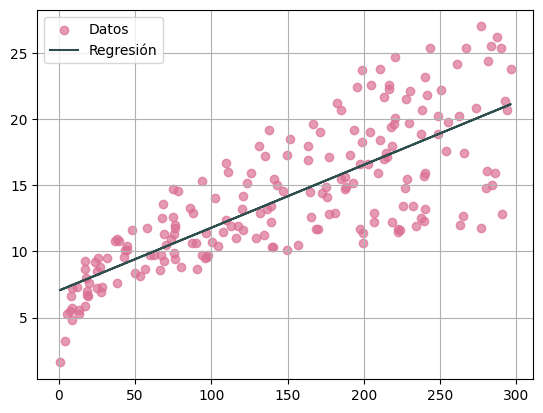

In [129]:
grafica(data['TV'], data['sales'])

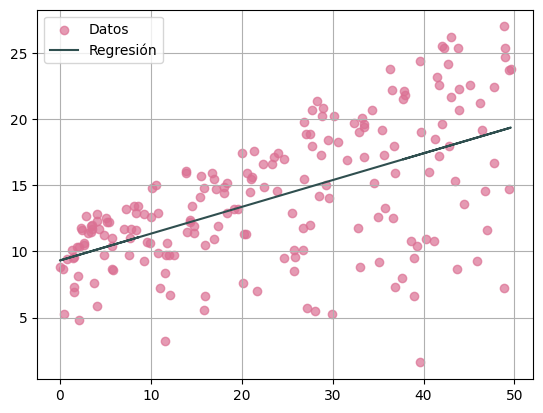

In [130]:
grafica(data['radio'], data['sales'])

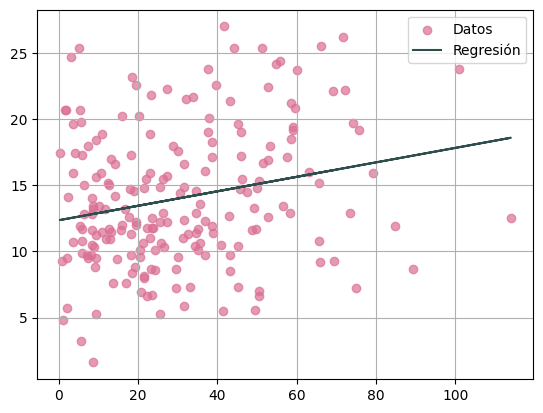

In [131]:
grafica(data['newspaper'], data['sales'])

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la librería `statsmodels` para realizar la regresión. Por defecto la librería statsmodels no toma en cuenta el intercepto ($\beta_0$), por lo que se tendrá que agregar una columna de unos de tamaño *n* a la matriz X.

`import statsmodels.api as sm`

`ols = sm.OLS(Y, X)`

`results = ols.fit()`

`results.summary()`

In [132]:
ols = sm.OLS(data['sales'], sm.add_constant(data[['TV', 'radio', 'newspaper']]))
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           1.58e-96
Time:                        18:02:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El periodico no importa, la información que nos da ya está contenida en TV o en radio.

In [133]:
ols = sm.OLS(data['sales'], sm.add_constant(data[['TV', 'radio']]))
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 30 Aug 2025   Prob (F-statistic):           4.83e-98
Time:                        18:02:50   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
data_sin_np = data.drop(columns=['newspaper'])
data_sin_np['mult'] = data_sin_np['TV'] * data_sin_np['radio']

In [135]:
ols = sm.OLS(data_sin_np['sales'], sm.add_constant(data_sin_np[['TV', 'radio', 'mult']]))
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sat, 30 Aug 2025   Prob (F-statistic):          6.68e-146
Time:                        18:02:50   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
mult           0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
data_mults = data
data_mults['TV_radio'] = data_mults['TV'] * data_mults['radio']
data_mults['TV_newspaper'] = data_mults['TV'] * data_mults['newspaper'] 
data_mults['radio_newspaper'] = data_mults['radio'] * data_mults['newspaper']

ols = sm.OLS(data_mults['sales'], sm.add_constant(data_mults[['TV', 'radio', 'newspaper', 'TV_radio', 'TV_newspaper', 'radio_newspaper']]))
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     993.3
Date:                Sat, 30 Aug 2025   Prob (F-statistic):          3.68e-142
Time:                        18:02:50   Log-Likelihood:                -267.49
No. Observations:                 200   AIC:                             549.0
Df Residuals:                     193   BIC:                             572.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.4602      0.318     20.342      0.000       5.834       7.087
TV                  0.0203      0.002     12.633      0.000       0.017       0.024
radio               0.0229      0.011      2.009      0.046       0.000       0.045
newspaper           0.0170      0.010      1.691      0.092      -0.003       0.037
TV_radio            0.0011   5.72e-05     19.930      0.000       0.001       0.001
TV_newspaper    -7.971e-05   3.58e-05     -2.227      0.027      -0.000   -9.12e-06
radio_newspaper    -0.0001      0.000     -0.464      0.643      -0.001       0.000
==============================================================================
Omnibus:                      111.385   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              767.483
Skew:                          -2.046   Prob(JB):                    2.20e-167
Kurtosis:                      11.681   Cond. No.                     3.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3

## Addendum

Para calcular los *p-values* de los parámetros sin `statsmodels`:
1. Calcular RSS
2. Calcular RSE
3. `var_beta = np.linalg.inv(X.T @ X) * rse**2` (X con columna de intercepto)
4. `std_beta = np.sqrt(var_beta.diagonal())` El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.
5. Calcular *estadístico t*
6. Calcular *p-value*